Average Brightness: 139.73


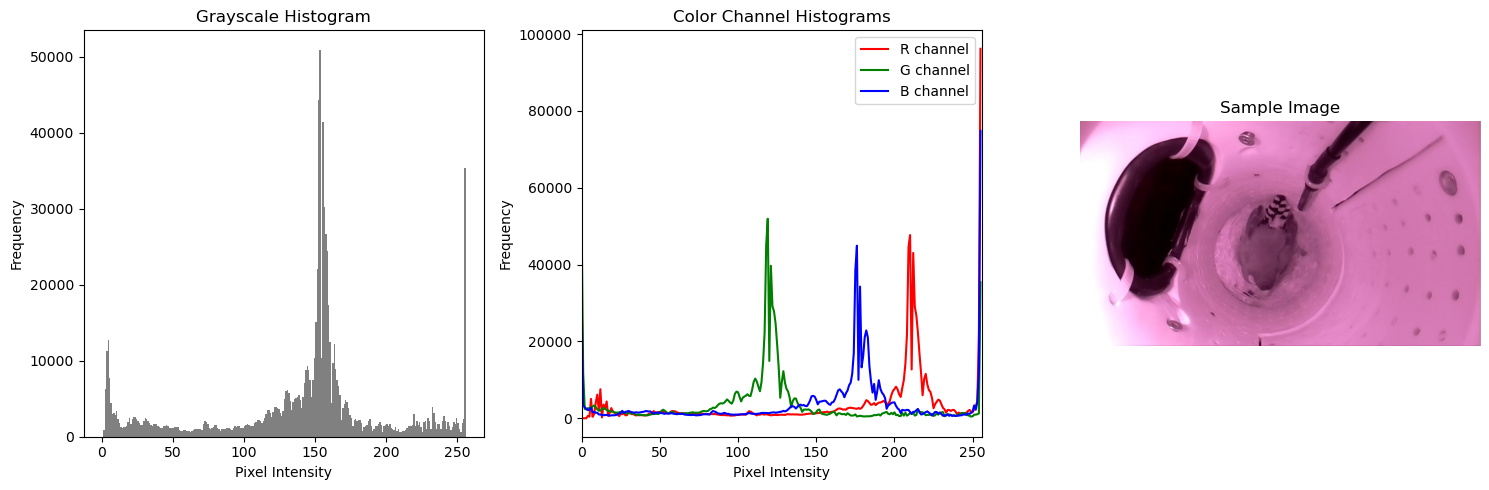

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load an image (make sure "sample.jpg" is in your working directory)
img_bgr = cv2.imread("E:\\Multicategory_frames\\INSC\\1000_frame_134.jpg")  # Loads image in BGR format
if img_bgr is None:
    raise FileNotFoundError("Could not load the image. Check the file path.")

# 2. Convert the BGR image to RGB (for consistent plotting in matplotlib)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 3. Convert to grayscale for brightness and intensity distribution
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# 4. Compute average brightness (simply the mean of grayscale pixel intensities)
average_brightness = np.mean(gray)
print(f"Average Brightness: {average_brightness:.2f}")

# 5. Create subplots to visualize different distributions and the original image
plt.figure(figsize=(15, 5))

# (a) Grayscale histogram
plt.subplot(1, 3, 1)
plt.hist(gray.ravel(), bins=256, range=(0, 256), color='gray')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# (b) Color histogram for each channel
colors = ('r', 'g', 'b')
plt.subplot(1, 3, 2)
for i, col in enumerate(colors):
    # cv2.calcHist arguments: images, channels, mask, histSize, ranges
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=col, label=f'{col.upper()} channel')
    plt.xlim([0, 256])
plt.title("Color Channel Histograms")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()

# (c) Show the original image for reference
plt.subplot(1, 3, 3)
plt.imshow(img_rgb)
plt.title("Sample Image")
plt.axis('off')  # Hide axis ticks

plt.tight_layout()
plt.show()
